# EDA of FIFA World Cup data till 2014

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly as py
import cufflinks as cf

In [3]:
from plotly.offline import iplot

In [4]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
world_cups=pd.read_csv('E:/WorldCups.csv')
players=pd.read_csv('E:/WorldCupPlayers.csv')
matches=pd.read_csv('E:/WorldCupMatches.csv')

In [6]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [7]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [8]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


## Data Cleaning

In [9]:
# dropping nul values

matches.dropna(subset=['Year'],inplace=True)

In [10]:
matches.tail() #null has been removed

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [11]:
# some team names have been changed over the years

matches['Home Team Name'].value_counts()

Brazil                     82
Italy                      57
Argentina                  54
Germany FR                 43
England                    35
                           ..
Ukraine                     1
rn">Trinidad and Tobago     1
IR Iran                     1
Canada                      1
Norway                      1
Name: Home Team Name, Length: 78, dtype: int64

In [12]:
# fixing country names like rn"> , FR in germany FR etc.

In [13]:
matches['Home Team Name'].str.contains('rn">')

0      False
1      False
2      False
3      False
4      False
       ...  
847    False
848    False
849    False
850    False
851    False
Name: Home Team Name, Length: 852, dtype: bool

In [14]:
#keeipng the above in a dataframe
matches[matches['Home Team Name'].str.contains('rn">')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
414,1990.0,09 Jun 1990 - 17:00,Group D,Renato Dall Ara,Bologna,"rn"">United Arab Emirates",0.0,2.0,Colombia,,30791.0,0.0,0.0,COURTNEY George (ENG),TAKADA Shizuo (JPN),SNODDY Alan (NIR),322.0,119.0,UAE,COL
433,1990.0,17 Jun 1990 - 17:00,Group F,Della Favorita,Palermo,"rn"">Republic of Ireland",0.0,0.0,Egypt,,33288.0,0.0,0.0,VAN LANGENHOVE Marcel (BEL),QUINIOU Joel (FRA),LO BELLO Rosario (ITA),322.0,152.0,IRL,EGY
446,1990.0,21 Jun 1990 - 21:00,Group F,Della Favorita,Palermo,"rn"">Republic of Ireland",1.0,1.0,Netherlands,,33288.0,0.0,1.0,VAUTROT Michel (FRA),LORENC Richard (AUS),HANSAL Mohamed (ALG),322.0,228.0,IRL,NED
452,1990.0,25 Jun 1990 - 17:00,Round of 16,Luigi Ferraris,Genoa,"rn"">Republic of Ireland",0.0,0.0,Romania,Republic of Ireland win on penalties (5 - 4),31818.0,0.0,0.0,RAMIZ WRIGHT Jose (BRA),MACIEL Carlos (PAR),MANDI Jassim (BHR),323.0,248.0,IRL,ROU
492,1994.0,28 Jun 1994 - 12:30,Group E,Giants Stadium,New York/New Jersey,"rn"">Republic of Ireland",0.0,0.0,Norway,,72404.0,0.0,0.0,TORRES CADENA Jose Joaquin (COL),ALVES Paulo Jorge (BRA),PARK Hae-Yong (KOR),337.0,3077.0,IRL,NOR
582,2002.0,01 Jun 2002 - 15:30,Group E,Niigata Stadium Big Swan,Niigata,"rn"">Republic of Ireland",1.0,1.0,Cameroon,,33679.0,0.0,1.0,KAMIKAWA Toru (JPN),AWANG HAMAT Mat Lazim (MAS),VAN NYLEN Roland (BEL),43950100.0,43950002.0,IRL,CMR
647,2006.0,10 Jun 2006 - 18:00,Group B,"FIFA World Cup Stadium, Dortmund",Dortmund,"rn"">Trinidad and Tobago",0.0,0.0,Sweden,,62959.0,0.0,0.0,MAIDIN Shamsul (SIN),PERMPANICH Prachya (THA),GHULOUM Eisa (UAE),97410100.0,97410004.0,TRI,SWE
649,2006.0,11 Jun 2006 - 15:00,Group C,Zentralstadion,Leipzig,"rn"">Serbia and Montenegro",0.0,1.0,Netherlands,,43000.0,0.0,1.0,MERK Markus (GER),SCHRAER Christian (GER),SALVER Jan-Hendrik (GER),97410100.0,97410006.0,SCG,NED
813,2014.0,25 Jun 2014 - 13:00,Group F,Arena Fonte Nova,Salvador,"rn"">Bosnia and Herzegovina",3.0,1.0,IR Iran,,48011.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255931.0,300186464.0,BIH,IRN


In [15]:
matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()

rn">Republic of Ireland       5
rn">Trinidad and Tobago       1
rn">United Arab Emirates      1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [16]:
names=matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names.index

Index(['rn">Republic of Ireland', 'rn">Trinidad and Tobago',
       'rn">United Arab Emirates', 'rn">Serbia and Montenegro',
       'rn">Bosnia and Herzegovina'],
      dtype='object')

In [17]:
wrong_list=list(names.index)
wrong_list

['rn">Republic of Ireland',
 'rn">Trinidad and Tobago',
 'rn">United Arab Emirates',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [18]:
correct_list= [name.split('>')[1] for name in wrong_list]
correct_list
#here we have the corrected names of teams with rn"> 

['Republic of Ireland',
 'Trinidad and Tobago',
 'United Arab Emirates',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [19]:
# correcting the other ones
old = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new = ['Germany', 'Maracanã Stadium', 'Maracanã Stadium']

In [20]:
wrong_list=wrong_list+old
correct_list=correct_list+new

In [21]:
wrong_list, correct_list

(['rn">Republic of Ireland',
  'rn">Trinidad and Tobago',
  'rn">United Arab Emirates',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'Trinidad and Tobago',
  'United Arab Emirates',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'Germany',
  'Maracanã Stadium',
  'Maracanã Stadium'])

In [22]:
for index, wr in enumerate(wrong_list):
    world_cups=world_cups.replace(wrong_list[index],correct_list[index])

for index, wr in enumerate(wrong_list):
    players=players.replace(wrong_list[index],correct_list[index])

for index, wr in enumerate(wrong_list):
    matches=matches.replace(wrong_list[index],correct_list[index])


In [23]:
matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()

Series([], Name: Home Team Name, dtype: int64)

## Most number of world cup winning title(up to 2014)

In [24]:
winner=world_cups['Winner'].value_counts()

In [25]:
winner

Brazil       5
Germany      4
Italy        4
Uruguay      2
Argentina    2
England      1
Spain        1
France       1
Name: Winner, dtype: int64

In [26]:
runnerup=world_cups['Runners-Up'].value_counts()

In [27]:
runnerup

Germany           4
Argentina         3
Netherlands       3
Hungary           2
Czechoslovakia    2
Brazil            2
Italy             2
France            1
Sweden            1
Name: Runners-Up, dtype: int64

In [28]:
third=world_cups['Third'].value_counts()

In [29]:
third

Germany        4
France         2
Poland         2
Sweden         2
Brazil         2
Austria        1
Italy          1
USA            1
Netherlands    1
Portugal       1
Chile          1
Turkey         1
Croatia        1
Name: Third, dtype: int64

In [30]:
# concatenate all three columns to create a dataframe
teams=pd.concat([winner,runnerup,third],axis=1)
teams.fillna(0,inplace=True)  #this is done to  fill NA values as 0
teams=teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Germany,4,4,4
Italy,4,2,1
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
Spain,1,0,0
France,1,1,2
Netherlands,0,3,1
Hungary,0,2,0


In [31]:
teams.iplot(kind='bar',xTitle='Teams',yTitle='Count',title="FIFA world cup winning count")

## Number of goals per country

In [32]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [33]:
home=matches[['Home Team Name','Home Team Goals']].dropna()
away=matches[['Away Team Name','Away Team Goals']].dropna()

In [34]:
home

,Home Team Name,Home Team Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
847,Netherlands,0.0
848,Brazil,1.0
849,Netherlands,0.0
850,Brazil,0.0


In [35]:
away

,Away Team Name,Away Team Goals
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0
...,...,...
847,Costa Rica,0.0
848,Germany,7.0
849,Argentina,0.0
850,Netherlands,3.0


In [36]:
home.columns=['Countries','Goals']
away.columns=home.columns

In [37]:
away

,Countries,Goals
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0
...,...,...
847,Costa Rica,0.0
848,Germany,7.0
849,Argentina,0.0
850,Netherlands,3.0


In [38]:
goals=home.append(away,ignore_index=True)  #indexes won't be in count

In [39]:
goals

,Countries,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
1699,Costa Rica,0.0
1700,Germany,7.0
1701,Argentina,0.0
1702,Netherlands,3.0


In [40]:
goals=goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,14.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


In [41]:
#sorting by goals
goals=goals.sort_values(by='Goals',ascending=False)
goals

,Goals
Countries,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Trinidad and Tobago,0.0
Canada,0.0
China PR,0.0


In [42]:
goals[:20].iplot(kind='bar',xTitle='Country Names',yTitle='Goals',title='Top 20 goalscoring nations')

## Attendance, Number of teams, Goals and Matches per cup

In [43]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


In [44]:
# fixing attendance. It has "," replace it to ""

world_cups['Attendance']=world_cups['Attendance'].str.replace(".","")

<ipython-input-44-a78e96642b83>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [45]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


In [46]:
world_cups['Attendance']=world_cups['Attendance'].astype(int)

<AxesSubplot:xlabel='Year', ylabel='Attendance'>

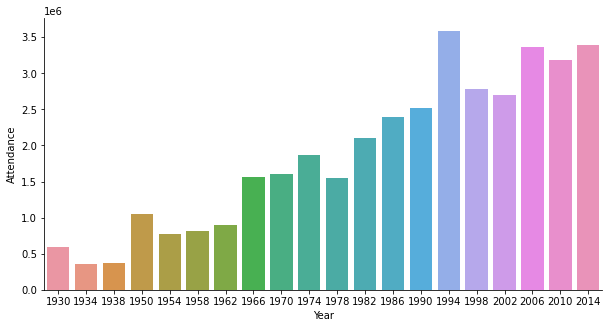

In [47]:
fig,ax=plt.subplots(figsize=(10,5))  #creates a box
sns.despine(right=True)  #removes top and right lines from the box

sns.barplot(x='Year',y='Attendance', data=world_cups)

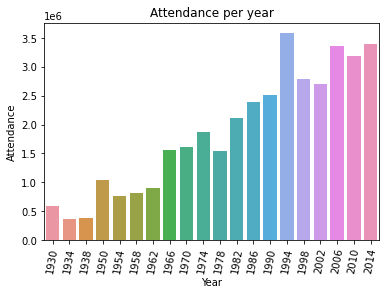

In [48]:
# rotating the upper plot's x-axis markings

g=sns.barplot(x='Year',y='Attendance', data=world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation=80)
g.set_title('Attendance per year') #setting the title

plt.show()

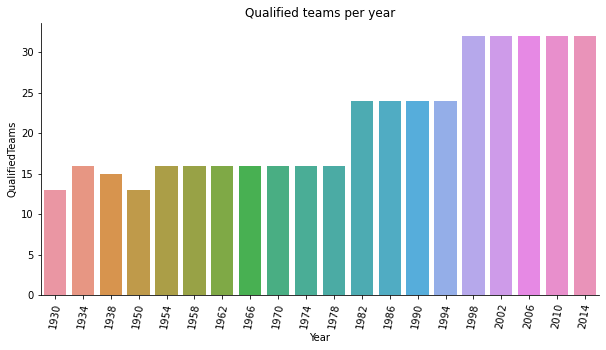

In [49]:
#Plotting qualified teams per year

fig,ax=plt.subplots(figsize=(10,5))  
sns.despine(right=True)  
g=sns.barplot(x='Year',y='QualifiedTeams', data=world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation=80)
g.set_title('Qualified teams per year') 

plt.show()

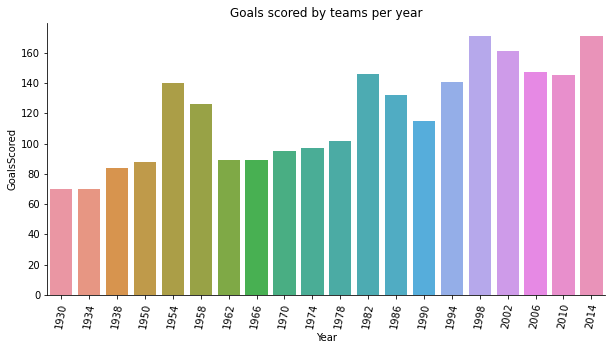

In [50]:
#Goals scored

fig,ax=plt.subplots(figsize=(10,5))  
sns.despine(right=True)  
g=sns.barplot(x='Year',y='GoalsScored', data=world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation=80)
g.set_title('Goals scored by teams per year') 

plt.show()

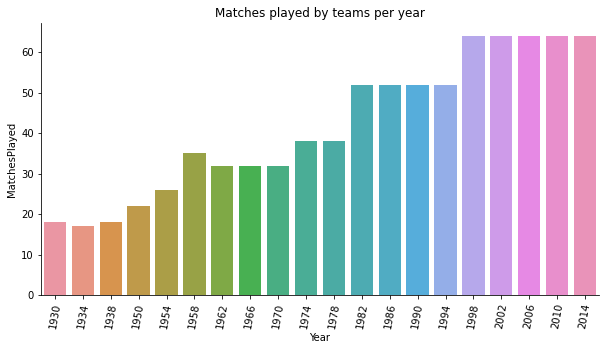

In [51]:
#Matches played by teams

fig,ax=plt.subplots(figsize=(10,5))  
sns.despine(right=True)  
g=sns.barplot(x='Year',y='MatchesPlayed', data=world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation=80)
g.set_title('Matches played by teams per year') 

plt.show()

## Goals per team per World cup

In [52]:
matches.head(1) 
#team by team and year by year how many total goals have been hit by each team

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [53]:
home=matches.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()
home

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [54]:
away=matches.groupby(['Year','Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [55]:
#concatenate Home and Away team stats

goals=pd.concat([home,away],axis=1)
goals

Home Team Goals  Away Team Goals
Year                                                
1930.0 Argentina               16.0              2.0
       Belgium                  NaN              0.0
       Bolivia                  NaN              0.0
       Brazil                   4.0              1.0
       Chile                    4.0              1.0
...                             ...              ...
2014.0 Russia                   1.0              1.0
       Spain                    1.0              3.0
       Switzerland              4.0              3.0
       USA                      2.0              4.0
       Uruguay                  3.0              1.0

[427 rows x 2 columns]

In [56]:
#filling null values
goals.fillna(0,inplace=True)
goals

Home Team Goals  Away Team Goals
Year                                                
1930.0 Argentina               16.0              2.0
       Belgium                  0.0              0.0
       Bolivia                  0.0              0.0
       Brazil                   4.0              1.0
       Chile                    4.0              1.0
...                             ...              ...
2014.0 Russia                   1.0              1.0
       Spain                    1.0              3.0
       Switzerland              4.0              3.0
       USA                      2.0              4.0
       Uruguay                  3.0              1.0

[427 rows x 2 columns]

In [57]:
#adding Home and Away goals for every country
goals['Goals']=goals['Home Team Goals']+goals['Away Team Goals']
goals

Home Team Goals  Away Team Goals  Goals
Year                                                       
1930.0 Argentina               16.0              2.0   18.0
       Belgium                  0.0              0.0    0.0
       Bolivia                  0.0              0.0    0.0
       Brazil                   4.0              1.0    5.0
       Chile                    4.0              1.0    5.0
...                             ...              ...    ...
2014.0 Russia                   1.0              1.0    2.0
       Spain                    1.0              3.0    4.0
       Switzerland              4.0              3.0    7.0
       USA                      2.0              4.0    6.0
       Uruguay                  3.0              1.0    4.0

[427 rows x 3 columns]

In [58]:
#dropping Home Team goals and Away team goals column
goals=goals.drop(labels=['Home Team Goals','Away Team Goals'], axis=1) 
# axis=1 is necessary to find which columns need to be dropped
goals

Goals
Year                     
1930.0 Argentina     18.0
       Belgium        0.0
       Bolivia        0.0
       Brazil         5.0
       Chile          5.0
...                   ...
2014.0 Russia         2.0
       Spain          4.0
       Switzerland    7.0
       USA            6.0
       Uruguay        4.0

[427 rows x 1 columns]

In [59]:
#Resetting indexes and changing column names
goals=goals.reset_index()
goals.columns=['Year','Country','Goals']
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
1,1930.0,Belgium,0.0
2,1930.0,Bolivia,0.0
3,1930.0,Brazil,5.0
4,1930.0,Chile,5.0
...,...,...,...
422,2014.0,Russia,2.0
423,2014.0,Spain,4.0
424,2014.0,Switzerland,7.0
425,2014.0,USA,6.0


In [60]:
# Sorting goals by Year in ascending and then by goals in descending
goals=goals.sort_values(by=['Year','Goals'],ascending=[True,False])
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
...,...,...,...
416,2014.0,Japan,2.0
422,2014.0,Russia,2.0
401,2014.0,Cameroon,1.0
413,2014.0,Honduras,1.0


In [61]:
#top 5 countries for each year

top5=goals.groupby('Year').head(5)
top5

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
...,...,...,...
410,2014.0,Germany,29.0
419,2014.0,Netherlands,20.0
400,2014.0,Brazil,15.0
403,2014.0,Colombia,15.0


In [62]:
import plotly.graph_objects as go

In [64]:
# to create a stacked bar chart for the countries
x,y=goals['Year'].values,goals['Goals'].values
data=[]
for team in top5['Country'].drop_duplicates().values:
    #print(team)  this prints team list
    year=top5[top5['Country']==team]['Year']
    goal=top5[top5['Country']==team]['Goals']
    
    data.append(go.Bar(x=year,y=goal,name=team))

layout=go.Layout(barmode='stack',title='Top 5 teams with most goals',showlegend=False)

In [65]:
fig=go.Figure(data=data, layout=layout)
fig.show()

## Matches with Highest Number of Attendance

In [67]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [68]:
#changing into date time format
matches['Datetime']=pd.to_datetime(matches['Datetime'])

In [70]:
# removed time from date-time
matches['Datetime']=matches['Datetime'].apply(lambda x: x.strftime('%d %b, %Y'))
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [71]:
# Top 10 matches by attendance
top10=matches.sort_values(by='Attendance', ascending=False)[:10]
top10

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
74,1950.0,"16 Jul, 1950",Group 6,Maracanã Stadium,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,,173850.0,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA
71,1950.0,"13 Jul, 1950",Group 6,Maracanã Stadium,Rio De Janeiro,Brazil,6.0,1.0,Spain,,152772.0,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP
63,1950.0,"01 Jul, 1950",Group 1,Maracanã Stadium,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,,142429.0,1.0,0.0,GRIFFITHS Benjamin (WAL),BERANEK Alois (AUT),DA COSTA VIEIRA Jose (POR),208.0,1191.0,BRA,YUG
70,1950.0,"09 Jul, 1950",Group 6,Maracanã Stadium,Rio De Janeiro,Brazil,7.0,1.0,Sweden,,138886.0,3.0,0.0,ELLIS Arthur (ENG),GARCIA Prudencio (USA),DE LA SALLE Charles (FRA),209.0,1189.0,BRA,SWE
379,1986.0,"07 Jun, 1986",Group B,Estadio Azteca,Mexico City,Mexico,1.0,1.0,Paraguay,,114600.0,1.0,0.0,COURTNEY George (ENG),FREDRIKSSON Erik (SWE),IGNA Ioan (ROU),308.0,680.0,MEX,PAR
411,1986.0,"29 Jun, 1986",Final,Estadio Azteca,Mexico City,Argentina,3.0,2.0,Germany,,114600.0,1.0,0.0,ARPPI FILHO Romualdo (BRA),FREDRIKSSON Erik (SWE),ULLOA MORERA Berny (CRC),3467.0,393.0,ARG,FRG
397,1986.0,"15 Jun, 1986",Round of 16,Estadio Azteca,Mexico City,Mexico,2.0,0.0,Bulgaria,,114580.0,1.0,0.0,ARPPI FILHO Romualdo (BRA),MENDEZ MOLINA Romulo (GUA),IGNA Ioan (ROU),309.0,463.0,MEX,BUL
407,1986.0,"22 Jun, 1986",Quarter-finals,Estadio Azteca,Mexico City,Argentina,2.0,1.0,England,,114580.0,0.0,0.0,BENNACEUR Ali (TUN),ULLOA MORERA Berny (CRC),DOTCHEV Bogdan (BUL),714.0,392.0,ARG,ENG
409,1986.0,"25 Jun, 1986",Semi-finals,Estadio Azteca,Mexico City,Argentina,2.0,0.0,Belgium,,114500.0,0.0,0.0,MARQUEZ RAMIREZ Antonio (MEX),MENDEZ MOLINA Romulo (GUA),SILVA VALENTE Carlos Alberto (POR),3469.0,388.0,ARG,BEL
367,1986.0,"03 Jun, 1986",Group B,Estadio Azteca,Mexico City,Belgium,1.0,2.0,Mexico,,110000.0,1.0,2.0,ESPOSITO Carlos (ARG),SILVA VALENTE Carlos Alberto (POR),MENDEZ MOLINA Romulo (GUA),308.0,428.0,BEL,MEX


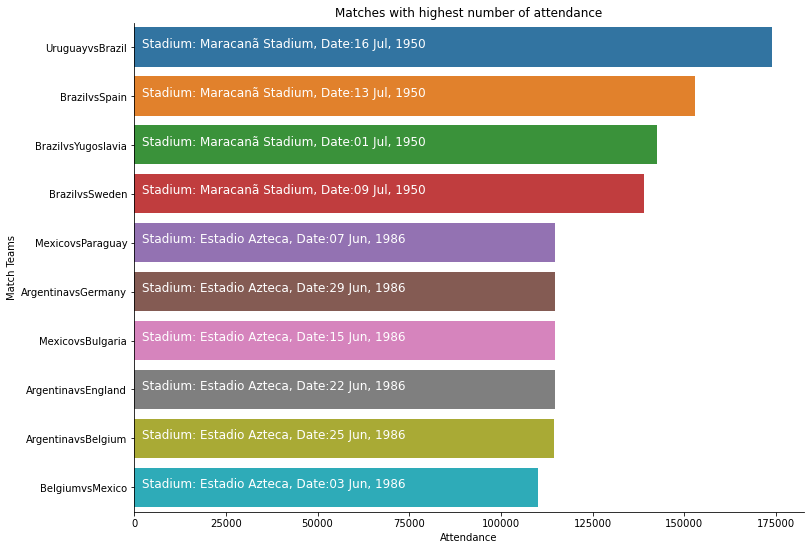

In [74]:
# top 10 matches 
top10['vs']=top10['Home Team Name']+'vs'+top10['Away Team Name']

plt.figure(figsize=(12,9))

ax=sns.barplot(y=top10['vs'], x=top10['Attendance'])
sns.despine(right=True)

plt.ylabel('Match Teams')
plt.xlabel('Attendance')
plt.title('Matches with highest number of attendance')

#get the stadium name and date on each bar
for i,s in enumerate('Stadium: '+top10['Stadium']+', Date:'+top10['Datetime']):
    ax.text(2000, i, s, fontsize=12, color='white')   #2000 is  a tested number

plt.show()

## Stadiums with Highest Average Attendance

In [79]:
matches['Year']=matches['Year'].astype(int)

std=matches.groupby(['Stadium','City'])['Attendance'].mean().reset_index().sort_values(by='Attendance', ascending=False)
#grouping by Stadium and city by the mean values, resetting the index and sorting in descending
std

,Stadium,City,Attendance
32,Estadio Azteca,Mexico City,100923.684211
136,Rose Bowl,Los Angeles,92600.875000
178,Wembley Stadium,London,86448.222222
98,Maracanã Stadium,Rio De Janeiro,86417.333333
150,Soccer City Stadium,Johannesburg,83857.375000
...,...,...,...
64,Giorgio Ascarelli,Naples,8000.000000
75,Independencia,Belo Horizonte,7590.333333
48,Eucaliptos,Porto Alegre,7329.000000
57,Fort Carree,Antibes,7000.000000


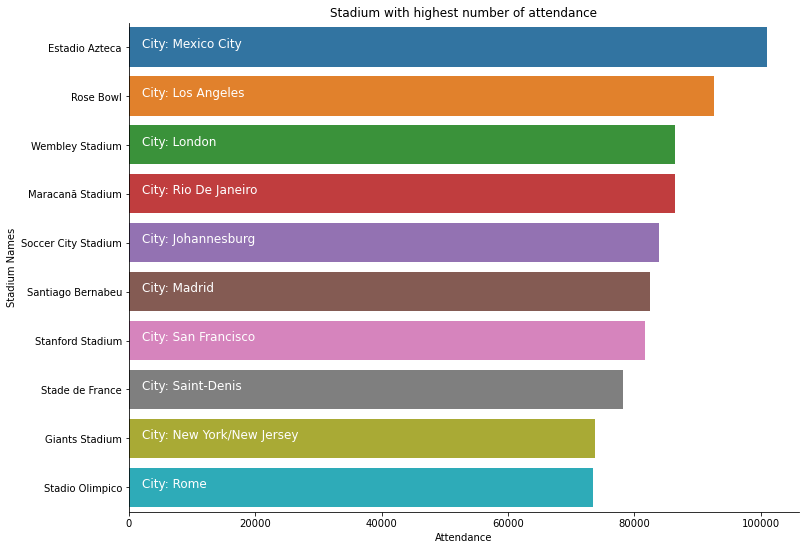

In [81]:
top10=std[:10]

plt.figure(figsize=(12,9))
ax=sns.barplot(y=top10['Stadium'], x=top10['Attendance'])
sns.despine(right=True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with highest number of attendance')

#get the city name on each bar
for i,s in enumerate('City: '+top10['City']):
    ax.text(2000, i, s, fontsize=12, color='white')   #2000 is  a tested number

plt.show()

In [82]:
#Cities which hosted the highest world cup matches
matches['City'].value_counts()[:20].iplot(kind='bar')

## Match Outcomes by Home and Away teams

In [83]:
#function to get labels of home and away team wins
def getlabels(matches):
    if matches['Home Team Goals']>matches['Away Team Goals']:
        return 'Home Team Wins'
    if matches['Home Team Goals']<matches['Away Team Goals']:
        return 'Away Team Wins'
    else:
        return 'DRAW'

In [87]:
matches['outcomes']=matches.apply(lambda x: getlabels(x), axis=1)
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcomes
0,1930,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Wins
1,1930,"13 Jul, 1930",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Wins
2,1930,"14 Jul, 1930",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Wins
3,1930,"14 Jul, 1930",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Wins
4,1930,"15 Jul, 1930",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Wins


In [88]:
plt.figure(figsize=(6,6))
nt=matches['outcomes'].value_counts()
nt

Home Team Wins    488
DRAW              190
Away Team Wins    174
Name: outcomes, dtype: int64

<Figure size 432x432 with 0 Axes>

<AxesSubplot:ylabel='outcomes'>

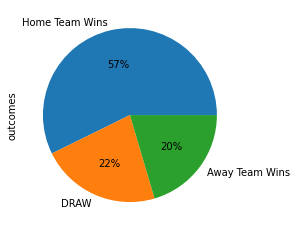

In [89]:
nt.plot.pie(autopct='%1.0f%%') 
# autopct gives the percentage inside the pie-plot

<AxesSubplot:ylabel='outcomes'>

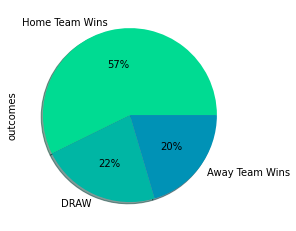

In [90]:
#modifications on pie-plot
nt.plot.pie(autopct='%1.0f%%', colors=sns.color_palette('winter_r'), shadow=True)

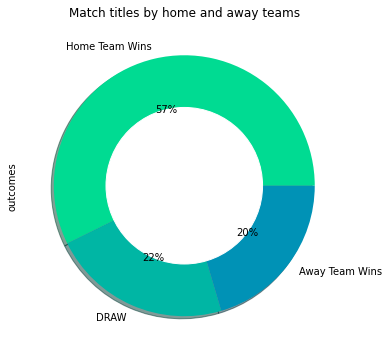

In [98]:
plt.figure(figsize=(6,6))

nt.plot.pie(autopct='%1.0f%%', colors=sns.color_palette('winter_r'), shadow=True)

#makes a Donut plot
c=plt.Circle((0,0), 0.6, color='white')  #0.6 determines the thickness
plt.gca().add_artist(c)
plt.title('Match titles by home and away teams')
plt.show()